In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_df = pd.read_csv("dataset/wine_train.csv", sep=';', quotechar='"')
test_df = pd.read_csv("dataset/wine_test.csv", sep=';', quotechar='"')

In [4]:
X_train = train_df.drop("quality", axis=1)
y_train = train_df["quality"]

X_test = test_df.drop("quality", axis=1)
y_test = test_df["quality"]


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = RidgeClassifier(alpha=1.0)
model.fit(X_train_scaled, y_train)

RidgeClassifier()

In [7]:
y_pred = model.predict(X_test_scaled)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Acuratețea modelului RidgeClassifier: {:.2f}%".format(accuracy * 100))

Acuratețea modelului RidgeClassifier: 51.63%


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.59      0.53      0.56       291
           6       0.49      0.80      0.61       432
           7       0.37      0.04      0.07       192
           8       0.00      0.00      0.00        35

    accuracy                           0.52       980
   macro avg       0.24      0.23      0.21       980
weighted avg       0.47      0.52      0.45       980



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

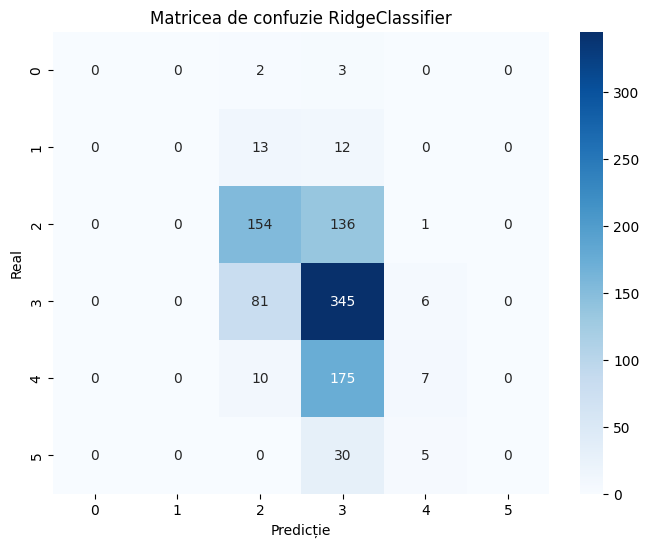

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicție")
plt.ylabel("Real")
plt.title("Matricea de confuzie RidgeClassifier")
plt.show()

In [12]:
print(model.classes_)


[3 4 5 6 7 8 9]


In [14]:
print(train_df["quality"].value_counts().sort_index())
print(test_df["quality"].value_counts().sort_index())

quality
3      15
4     138
5    1166
6    1766
7     688
8     140
9       5
Name: count, dtype: int64
quality
3      5
4     25
5    291
6    432
7    192
8     35
Name: count, dtype: int64
